In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
NUM_WORDS = 10000
(train_data,train_labels),(test_data,test_labels)=keras.datasets.imdb.load_data(num_words=NUM_WORDS)
def multi_hot_sequences(sequences,dimension):
    #create all-zero matrix of shape (len (sequences),dimension)
    results = np.zeros((len(sequences),dimension))
    for i, word_indices in enumerate (sequences):
        results[i, word_indices]=1.0
    return results

train_data = multi_hot_sequences(train_data,dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data,dimension=NUM_WORDS)


17465344/17464789 [==============================] - 0s 0us/step


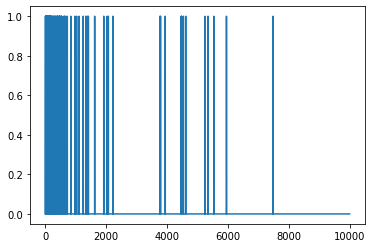

In [3]:
plt.plot(train_data[0])

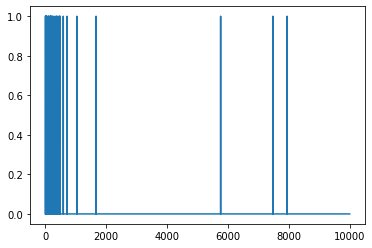

In [4]:
plt.plot(test_data[0])

In [5]:
#CREATE A BASE MODEL

In [8]:
baseline_model= keras.Sequential([
    keras.layers.Dense(16,activation=tf.nn.relu,input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16,activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])
baseline_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy','binary_crossentropy'])
baseline_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [9]:
baseline_history = baseline_model.fit(train_data,train_labels,epochs=20,batch_size=512,validation_data=(test_data,test_labels),verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.4629 - accuracy: 0.8197 - binary_crossentropy: 0.4629 - val_loss: 0.3361 - val_accuracy: 0.8707 - val_binary_crossentropy: 0.3361
Epoch 2/20
49/49 - 1s - loss: 0.2449 - accuracy: 0.9133 - binary_crossentropy: 0.2449 - val_loss: 0.2848 - val_accuracy: 0.8872 - val_binary_crossentropy: 0.2848
Epoch 3/20
49/49 - 1s - loss: 0.1820 - accuracy: 0.9368 - binary_crossentropy: 0.1820 - val_loss: 0.2876 - val_accuracy: 0.8856 - val_binary_crossentropy: 0.2876
Epoch 4/20
49/49 - 1s - loss: 0.1468 - accuracy: 0.9520 - binary_crossentropy: 0.1468 - val_loss: 0.3108 - val_accuracy: 0.8782 - val_binary_crossentropy: 0.3108
Epoch 5/20
49/49 - 1s - loss: 0.1210 - accuracy: 0.9616 - binary_crossentropy: 0.1210 - val_loss: 0.3319 - val_accuracy: 0.8760 - val_binary_crossentropy: 0.3319
Epoch 6/20
49/49 - 1s - loss: 0.1001 - accuracy: 0.9691 - binary_crossentropy: 0.1001 - val_loss: 0.3617 - val_accuracy: 0.8724 - val_binary_crossentropy: 0.3617
Epoch 7/20
49/49 - 1s - loss

In [10]:
#CREATE A SMALLER MODEL

In [11]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4,activation=tf.nn.relu,input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4,activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])
smaller_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy','binary_crossentropy'])
smaller_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [12]:
smaller_history = smaller_model.fit(train_data,train_labels,epochs=20,batch_size=512,validation_data=(test_data,test_labels),verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.5863 - accuracy: 0.7707 - binary_crossentropy: 0.5863 - val_loss: 0.4817 - val_accuracy: 0.8535 - val_binary_crossentropy: 0.4817
Epoch 2/20
49/49 - 1s - loss: 0.3855 - accuracy: 0.8886 - binary_crossentropy: 0.3855 - val_loss: 0.3591 - val_accuracy: 0.8786 - val_binary_crossentropy: 0.3591
Epoch 3/20
49/49 - 1s - loss: 0.2821 - accuracy: 0.9129 - binary_crossentropy: 0.2821 - val_loss: 0.3104 - val_accuracy: 0.8849 - val_binary_crossentropy: 0.3104
Epoch 4/20
49/49 - 1s - loss: 0.2281 - accuracy: 0.9277 - binary_crossentropy: 0.2281 - val_loss: 0.2903 - val_accuracy: 0.8870 - val_binary_crossentropy: 0.2903
Epoch 5/20
49/49 - 1s - loss: 0.1942 - accuracy: 0.9377 - binary_crossentropy: 0.1942 - val_loss: 0.2852 - val_accuracy: 0.8870 - val_binary_crossentropy: 0.2852
Epoch 6/20
49/49 - 1s - loss: 0.1699 - accuracy: 0.9450 - binary_crossentropy: 0.1699 - val_loss: 0.2854 - val_accuracy: 0.8866 - val_binary_crossentropy: 0.2854
Epoch 7/20
49/49 - 1s - loss

In [13]:
#CREATE BIGGER MODEL

In [14]:
bigger_model = keras.Sequential([
    keras.layers.Dense(512,activation=tf.nn.relu,input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512,activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])
bigger_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy','binary_crossentropy'])
bigger_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [15]:
bigger_history = bigger_model.fit(train_data,train_labels,epochs=20,batch_size=512,validation_data=(test_data,test_labels),verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.3491 - accuracy: 0.8483 - binary_crossentropy: 0.3491 - val_loss: 0.2923 - val_accuracy: 0.8812 - val_binary_crossentropy: 0.2923
Epoch 2/20
49/49 - 1s - loss: 0.1415 - accuracy: 0.9484 - binary_crossentropy: 0.1415 - val_loss: 0.3235 - val_accuracy: 0.8727 - val_binary_crossentropy: 0.3235
Epoch 3/20
49/49 - 1s - loss: 0.0428 - accuracy: 0.9880 - binary_crossentropy: 0.0428 - val_loss: 0.4488 - val_accuracy: 0.8703 - val_binary_crossentropy: 0.4488
Epoch 4/20
49/49 - 1s - loss: 0.0051 - accuracy: 0.9994 - binary_crossentropy: 0.0051 - val_loss: 0.5923 - val_accuracy: 0.8700 - val_binary_crossentropy: 0.5923
Epoch 5/20
49/49 - 1s - loss: 0.0015 - accuracy: 1.0000 - binary_crossentropy: 0.0015 - val_loss: 0.6599 - val_accuracy: 0.8715 - val_binary_crossentropy: 0.6599
Epoch 6/20
49/49 - 1s - loss: 2.3065e-04 - accuracy: 1.0000 - binary_crossentropy: 2.3065e-04 - val_loss: 0.7116 - val_accuracy: 0.8723 - val_binary_crossentropy: 0.7116
Epoch 7/20
49/49 - 1

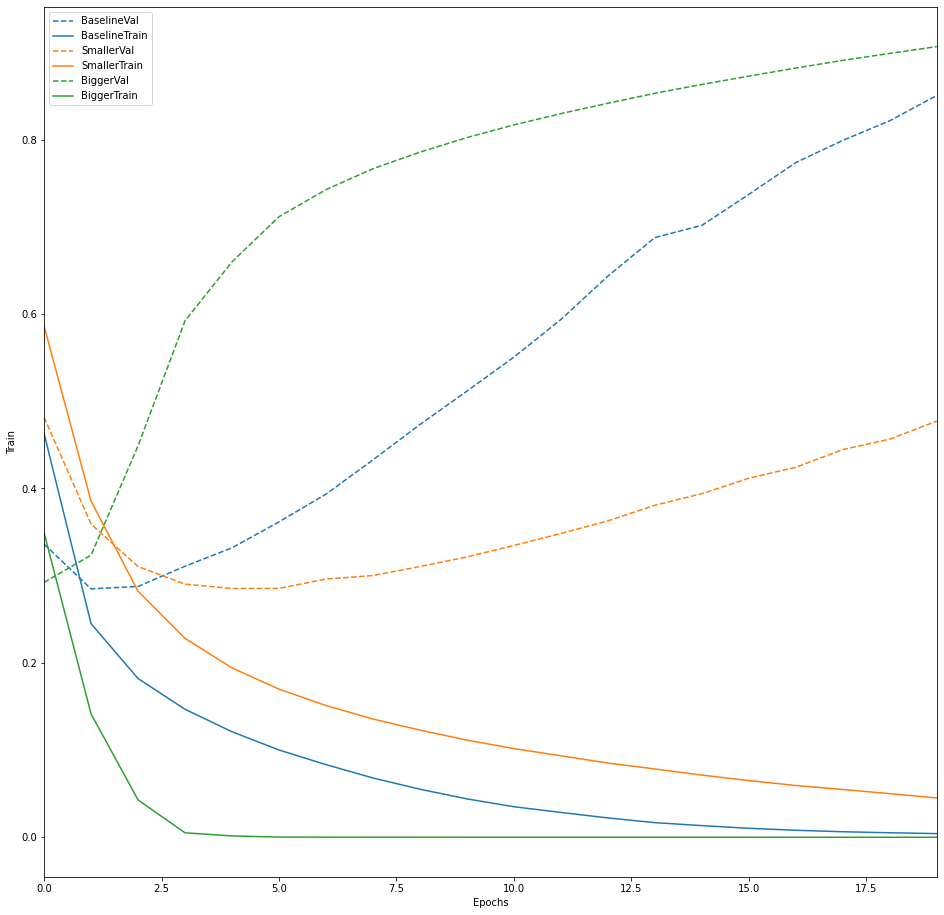

In [16]:
def plot_history(histories,key='binary_crossentropy'):
  plt.figure(figsize=(16,16))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--',label=name.title()+ 'Val')
    plt.plot(history.epoch,history.history[key],color=val[0].get_color(),label=name.title()+'Train')
    plt.xlabel('Epochs')
    plt.ylabel('Train')
    plt.legend()
    plt.xlim([0,max(history.epoch)])
plot_history([('baseline',baseline_history),('smaller',smaller_history),('bigger',bigger_history)])